# Homework 7, October 5, 2023

**Due by 9pm, October 12, 2023**

Please submit both PDF and ipynb formats of your completed notebook.

# Problem 1: Correlation Coefficient

Pearson's correlation coefficient, often represented by the symbol \( r \), measures the linear relationship between two datasets. The formula to calculate Pearson's \( r \) is:

$
\large r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}\sum{(y_i - \bar{y})^2}}}
$

1. Define a function that takes variables (stored in numpy arrays) as input arguments and return the Pearson's correlation coefficient. Do not use any loops in this calculation. You may use numpy functions such as mean(), sum(), etc. Do not use any built-in function of any python module/package that directly returns the correlation coefficient.

Your implementation can be cross-checked with the lines below

correlation_matrix = np.corrcoef(x,y)

correlation_coefficient = correlation_matrix[0, 1]



In [homework 4, problem 3](https://github.com/haichenwangberkeley/physics-77-88-fall23/blob/main/HW/week4/HW4-F23.ipynb) , you analyzed a Cardiovascular Disease dataset. Now use your own Pearson's correlation coefficient function to check the correlation between the following variables:

        * height vs weight
        * blood pressure (ap_hi) vs weight
        * age vs weight
        * age vs blood pressure (ap_hi)
        * weight vs cholesterol
        
and also cross check with the numpy built-in function to see if your implementation is correct.
    
       
        

In [ ]:

# 15 pts for correct implementation of correlation coefficient function
# 1 pt for corrent answer for each correlation evaluation 


# Problem 2: Monte Carlo Integration

Use the Monte Carlo method to integrate the function below from 0 to 2$\pi$ in $x$ and from $-2\pi$ to 0 in $y$


$\large f(x,y) = sin(x \cdot e^{y})$

i.e., 

calculate 

$\large I = \int_{-2\pi}^{0}\int_{0}^{2\pi} f(x,y) dx dy$

In this problem, you will generate randomly distributed points in the 3-dimensional space in x, y, and z. You will need to determine which volume of this space contributes to the integral, and which part of that contributes positively, and which part contributes negatively.

1. Define a function that returns the integral and takes one input argument that is the number of points generated

2. Use 100000 points for your estimate and report the result. Repeat it with 500 points. A cross-check using scipy is provided in a code cell for you to verify your implementation

3. Run your estimates 1000 times and draw the distribution of the estimated integrals. Each time, use 500 points as the input to your function. How does the mean of this distribution compare to your answer in Part 2 and the cross check ? Summarize it in a markdown cell



In [ ]:
# Here are some code to visualize this function in the specified ranges

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return np.sin(x*np.exp(y)) 

# Generate data points for x and y
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 0, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and a title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Surface Plot of f(x, y)')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.show()



In [ ]:
# Your code here
# 20 pts for the function implementation
# 2 pts each for using the function to make an estimate, with 10,000 points and with 500 points.

In [ ]:
print("The value of the MC-based integral is:", your number)

You may use the cell below to verify your answer. This cell uses a numerical integration method to perform the integral.

In [ ]:
import numpy as np
from scipy.integrate import dblquad

# Define the function
def f(x, y):
    return np.sin(x * np.exp(y))

# Define the limits of integration
x_lower_limit = 0
x_upper_limit = 2 * np.pi
y_lower_limit = -2 * np.pi
y_upper_limit = 0

# Calculate the double integral
result, _ = dblquad(f, y_lower_limit, y_upper_limit, lambda y: x_lower_limit, lambda y: x_upper_limit)

print("The value of the double integral is:", result)


In [ ]:
# your code for part 3

# 10 pts for plotting the distribution
# 1 pts for reporting the mean
# 5 pts for offering your analysis in the markdown cell

**Your observation** 5 pts

# Problem 3:  Simulation of E. Coli evoluation

This problem is inspired by [this Youtube video](https://www.youtube.com/watch?v=yybsSqcB7mE)

The E. Coli is a type of unicellular bacteria. Antibiotics can be used to eliminate E. Coli. The E. Coli bacteria can possess some level of resistance to antibiotics, and that resistance may vary as E. Coli bacteria reproduce themselves. In other words, mutations during reproduction can either increase or decrease an E. Coli bacterium's resistance to antibiotic. In this problem, we will write a Monte Carlo program to simulate the evolation of E. Coli bacteria. 

Here is our model:

For a single E. Coli bacterium, it has the following properties:
- Antibotic resistance ($R$)
- Position $x$
- A time index $t = 0, 1, 2, 3, ...$

There is a rectangular petri dish divided into 4 bands with different levels of antibiotic ($L$). The antibiotic level $L$, is:
- 1 for 0 < x <= 1
- 10 for 1 < x <= 2
- 100 for 2 < x <= 3
- 1000 for 3 < x <= 4 
- 10000 for 4 < x <= 5
- ...

At $t = 0$, a bacterium is released at $x = 0$, and the bacterium has an initial resistance of $R = 2$. For each unit of time elapsed:
- the bacterium reproduces itself and the new bacterium moves by $\delta{x}$, which is a Gaussian random number drawn from a PDF with a mean of 0.1 and a standard deviation of 0.005
- the new bacterium's resistance varies by $R = R*r$ where $r$ is a Gaussian random number drawn from a PDF with a mean of 1.1 and a standard deviation of 0.3. This allows the resistance of a bacterium to vary in both direction, but an increase is more likely.
- when the newly produced bacterium is at a position in $x$ where its resistance $R$ is smaller than the antibiotic level $L$ ( $R < L$), it has 50% chance to be killed by the antibiotic. If $R > L$, then the bacterium will always survive.

1. Write a function that takes the $x$ position and returns the antibiotic level $L$.

2. Write a function that model this process. Inside this function, a bacterium is placed at t = 0, and you can use a while loop to keep track of the new bacterium produced, and its $x$ position, resistance $R$, and whether or not it would be killed by antibiotic. This function will return a list of $x$ positions of each newly produced bacterium that was not killed by the antibiotic. The while-loop stops when the latest bacterium is killed by antibiotic. **Run this function fives time and print out the x positions**

3. At $t = 0$, we place 1000 bacteria at x = 0, and they are evenly distributed in y between 0 and 1. Call your simulation function repeatedly (i.e., 1000 times). Draw the positions (x,y) of all the newly produced bacteria .

Your plot will look similar to this
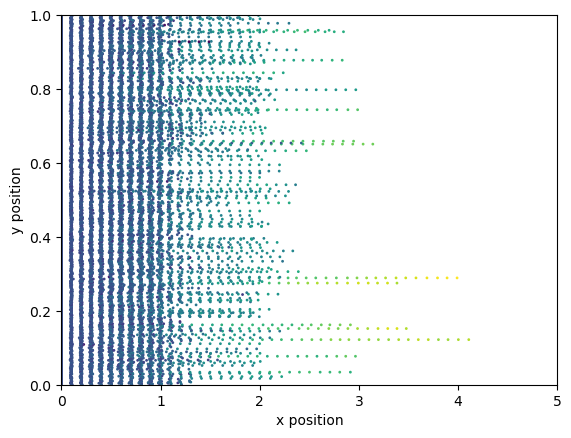
Here I used scatter() to place points on the x-y plane, and each point corresponds to the position of a new bacterium that survived the antibiotic. Each horiztonal row of points correspond to a line of E. Coli reproduction. The color scale was chosen in a way to reflect their level of resistance (give it a try but you won't lose points if you can't figure out a proper color scale). The lighter the marker, the stronger their resistance. The size of the marker is 1. As you can see a large number of lines of reproduction end, when the bacteria reach $x = 1$ where the level of antibiotic is 10. Then, for those survived, their resistance levels continue to increase between x = 1 and x = 2 (the color gets lighter). Many of these lines end at x = 3. **Your plot will look different.**

In [ ]:
# Your code to define function L vs x

# 5 pts

In [ ]:
# Your code to define the simulation function 

# print out the x positions of bacteria 

#20 pts

In [ ]:
# part 3. Visualize the positions of the bacteria population 15 pts 